In [1]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [2]:
! kaggle datasets download -d jsphyg/weather-dataset-rattle-package

  0% 0.00/3.83M [00:00<?, ?B/s]
100% 3.83M/3.83M [00:00<00:00, 95.5MB/s]


In [3]:
! unzip /content/weather-dataset-rattle-package.zip

Archive:  /content/weather-dataset-rattle-package.zip
  inflating: weatherAUS.csv          


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tqdm 
import seaborn as sn
from sklearn import metrics, preprocessing, model_selection

# Read the Data

In [5]:
dataset = pd.read_csv('/content/weatherAUS.csv')
dataset 

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [6]:
# show the dataset information 
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

# Preprocessing the Dataset 

In [7]:
# drop the na values 
dataset.dropna(inplace=True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56420 entries, 6049 to 142302
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           56420 non-null  object 
 1   Location       56420 non-null  object 
 2   MinTemp        56420 non-null  float64
 3   MaxTemp        56420 non-null  float64
 4   Rainfall       56420 non-null  float64
 5   Evaporation    56420 non-null  float64
 6   Sunshine       56420 non-null  float64
 7   WindGustDir    56420 non-null  object 
 8   WindGustSpeed  56420 non-null  float64
 9   WindDir9am     56420 non-null  object 
 10  WindDir3pm     56420 non-null  object 
 11  WindSpeed9am   56420 non-null  float64
 12  WindSpeed3pm   56420 non-null  float64
 13  Humidity9am    56420 non-null  float64
 14  Humidity3pm    56420 non-null  float64
 15  Pressure9am    56420 non-null  float64
 16  Pressure3pm    56420 non-null  float64
 17  Cloud9am       56420 non-null  float64
 18  Cl

In [8]:
dataset

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
6049,2009-01-01,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,...,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,No,No
6050,2009-01-02,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,...,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,No,No
6052,2009-01-04,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,...,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,No,No
6053,2009-01-05,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,...,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,No,No
6054,2009-01-06,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,...,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142298,2017-06-20,Darwin,19.3,33.4,0.0,6.0,11.0,ENE,35.0,SE,...,63.0,32.0,1013.9,1010.5,0.0,1.0,24.5,32.3,No,No
142299,2017-06-21,Darwin,21.2,32.6,0.0,7.6,8.6,E,37.0,SE,...,56.0,28.0,1014.6,1011.2,7.0,0.0,24.8,32.0,No,No
142300,2017-06-22,Darwin,20.7,32.8,0.0,5.6,11.0,E,33.0,E,...,46.0,23.0,1015.3,1011.8,0.0,0.0,24.8,32.1,No,No
142301,2017-06-23,Darwin,19.5,31.8,0.0,6.2,10.6,ESE,26.0,SE,...,62.0,58.0,1014.9,1010.7,1.0,1.0,24.8,29.2,No,No


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2707339410>,
      dtype=object)

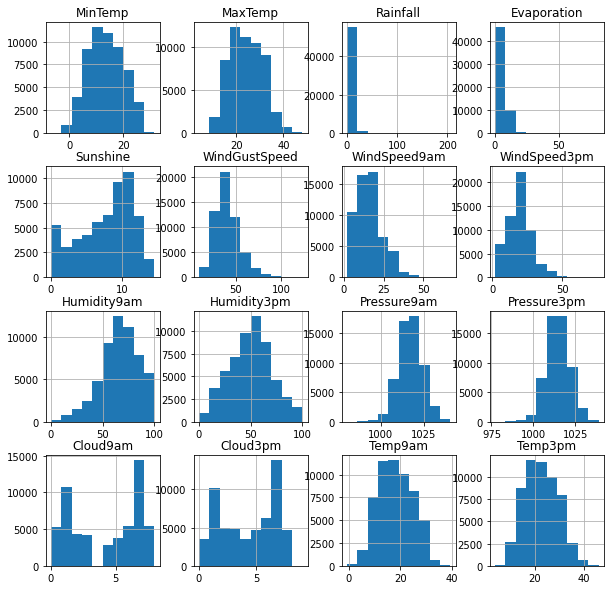

In [9]:
# plot the histogram 
dataset.hist(figsize=(10,10))

In [10]:
dataset.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000
mean,13.464770,24.219206,2.130397,5.503135,7.735626,40.877366,15.667228,19.786778,65.874123,49.601985,1017.239505,1014.795580,4.241705,4.326515,18.204961,22.710333
std,6.416689,6.970676,7.014822,3.696282,3.758153,13.335232,8.317005,8.510180,18.513289,20.197040,6.909357,6.870892,2.797162,2.647251,6.567991,6.836543
min,-6.700000,4.100000,0.000000,0.000000,0.000000,9.000000,2.000000,2.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-0.700000,3.700000
25%,8.600000,18.700000,0.000000,2.800000,5.000000,31.000000,9.000000,13.000000,55.000000,35.000000,1012.700000,1010.100000,1.000000,2.000000,13.100000,17.400000
50%,13.200000,23.900000,0.000000,5.000000,8.600000,39.000000,15.000000,19.000000,67.000000,50.000000,1017.200000,1014.700000,5.000000,5.000000,17.800000,22.400000
75%,18.400000,29.700000,0.600000,7.400000,10.700000,48.000000,20.000000,26.000000,79.000000,63.000000,1021.800000,1019.400000,7.000000,7.000000,23.300000,27.900000
max,31.400000,48.100000,206.200000,81.200000,14.500000,124.000000,67.000000,76.000000,100.000000,100.000000,1040.400000,1038.900000,8.000000,9.000000,39.400000,46.100000


In [11]:
dataset

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
6049,2009-01-01,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,...,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,No,No
6050,2009-01-02,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,...,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,No,No
6052,2009-01-04,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,...,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,No,No
6053,2009-01-05,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,...,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,No,No
6054,2009-01-06,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,...,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142298,2017-06-20,Darwin,19.3,33.4,0.0,6.0,11.0,ENE,35.0,SE,...,63.0,32.0,1013.9,1010.5,0.0,1.0,24.5,32.3,No,No
142299,2017-06-21,Darwin,21.2,32.6,0.0,7.6,8.6,E,37.0,SE,...,56.0,28.0,1014.6,1011.2,7.0,0.0,24.8,32.0,No,No
142300,2017-06-22,Darwin,20.7,32.8,0.0,5.6,11.0,E,33.0,E,...,46.0,23.0,1015.3,1011.8,0.0,0.0,24.8,32.1,No,No
142301,2017-06-23,Darwin,19.5,31.8,0.0,6.2,10.6,ESE,26.0,SE,...,62.0,58.0,1014.9,1010.7,1.0,1.0,24.8,29.2,No,No


In [12]:
# drop out the Date	Location columns 
dataset.drop(columns=['Location','Date'],inplace=True)


In [13]:
dataset 

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
6049,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,SW,6.0,...,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,No,No
6050,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,SSE,19.0,...,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,No,No
6052,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,NNW,30.0,...,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,No,No
6053,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,WSW,6.0,...,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,No,No
6054,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,WNW,17.0,...,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142298,19.3,33.4,0.0,6.0,11.0,ENE,35.0,SE,NE,9.0,...,63.0,32.0,1013.9,1010.5,0.0,1.0,24.5,32.3,No,No
142299,21.2,32.6,0.0,7.6,8.6,E,37.0,SE,SE,13.0,...,56.0,28.0,1014.6,1011.2,7.0,0.0,24.8,32.0,No,No
142300,20.7,32.8,0.0,5.6,11.0,E,33.0,E,W,17.0,...,46.0,23.0,1015.3,1011.8,0.0,0.0,24.8,32.1,No,No
142301,19.5,31.8,0.0,6.2,10.6,ESE,26.0,SE,NNW,9.0,...,62.0,58.0,1014.9,1010.7,1.0,1.0,24.8,29.2,No,No


In [14]:
dataset .iloc[0]

MinTemp            17.9
MaxTemp            35.2
Rainfall            0.0
Evaporation        12.0
Sunshine           12.3
WindGustDir         SSW
WindGustSpeed      48.0
WindDir9am          ENE
WindDir3pm           SW
WindSpeed9am        6.0
WindSpeed3pm       20.0
Humidity9am        20.0
Humidity3pm        13.0
Pressure9am      1006.3
Pressure3pm      1004.4
Cloud9am            2.0
Cloud3pm            5.0
Temp9am            26.6
Temp3pm            33.4
RainToday            No
RainTomorrow         No
Name: 6049, dtype: object

In [15]:
dataset.WindGustDir=dataset.WindGustDir.factorize()[0]
dataset.WindDir9am=dataset.WindDir9am.factorize()[0]
dataset.WindDir3pm=dataset.WindDir3pm.factorize()[0]
dataset.RainToday=dataset.RainToday.factorize()[0]
dataset.RainTomorrow=dataset.RainTomorrow.factorize()[0]

In [30]:
new_dataset=dataset[dataset.RainToday==1]
new_dataset = new_dataset.append(dataset[dataset.RainToday==0].sample(n=len(new_dataset.RainToday)))
new_dataset

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
6068,23.3,39.4,4.8,12.0,10.9,10,59.0,5,10,19.0,...,54.0,14.0,1011.1,1008.5,1.0,7.0,27.0,37.0,1,0
6071,20.3,36.0,18.0,8.2,10.5,11,94.0,2,10,13.0,...,89.0,50.0,1008.6,1006.7,7.0,4.0,24.7,33.4,1,1
6072,22.1,34.7,8.6,8.6,12.4,12,50.0,10,0,11.0,...,46.0,23.0,1008.6,1008.3,2.0,6.0,28.1,33.2,1,0
6083,24.1,41.4,1.6,12.6,12.3,6,39.0,8,3,17.0,...,50.0,21.0,1007.0,1003.5,0.0,4.0,28.2,38.8,1,0
6093,16.1,19.1,26.0,6.6,0.0,13,54.0,13,12,28.0,...,81.0,93.0,1014.3,1013.2,7.0,7.0,17.1,17.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37094,-0.3,10.8,0.4,0.2,3.3,11,24.0,13,7,4.0,...,98.0,80.0,1025.4,1024.1,8.0,1.0,2.5,9.1,0,0
140615,23.8,35.0,0.0,7.8,10.6,3,35.0,6,2,15.0,...,82.0,41.0,1015.1,1010.3,5.0,5.0,26.4,32.2,0,0
120695,8.7,24.1,0.0,5.4,9.2,2,30.0,0,6,9.0,...,53.0,37.0,1017.3,1013.1,1.0,3.0,16.0,23.2,0,0
45747,5.6,19.5,0.0,2.8,6.8,9,17.0,6,4,9.0,...,69.0,49.0,1025.7,1021.8,6.0,4.0,14.3,18.6,0,0


In [35]:
# split the data to features and labels 
x=new_dataset.iloc[:,:-2]
y=new_dataset.iloc[:,-2]

In [36]:
# scale the feature values between 0,1
min_max_preprocess =preprocessing.StandardScaler()
min_max_preprocess.fit(x)
x_norm=min_max_preprocess.transform(x)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f266d9ee910>,
      dtype=object)

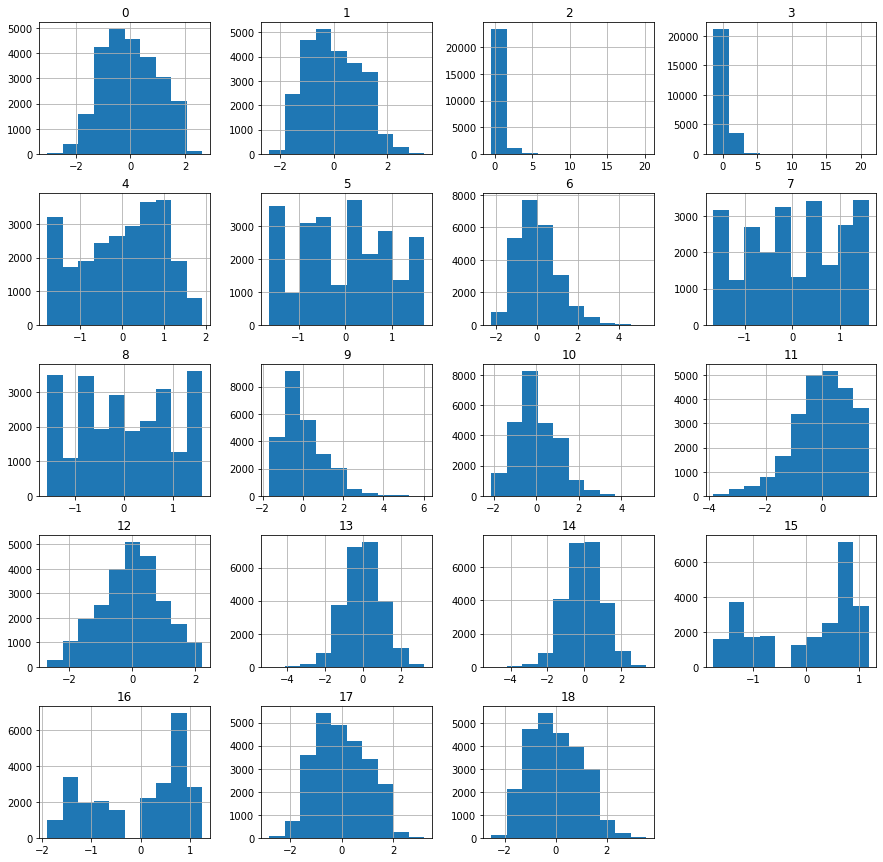

In [37]:
pd.DataFrame(x_norm).hist(figsize=(15,15))

(array([12462.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 12462.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

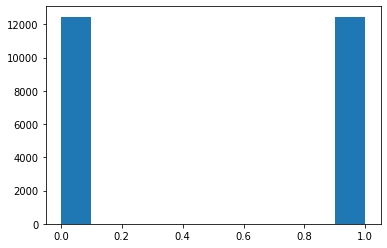

In [38]:
plt.hist(y)

# Spilt the Data to Train & Test 

In [39]:
x_train,x_test,y_train,y_test = model_selection.train_test_split(x_norm,y,test_size=0.1,random_state=42,stratify=y)

# Create the Data Pipeline

In [40]:
# creat the data pipeline
def data_pipeline(x,y,batch_size=32):
    # insert the data to the data pipeline
    data=tf.data.Dataset.from_tensor_slices((x,y))
    data=data.shuffle(50000)# shuffle the data
    data=data.batch(batch_size)# creat the batch
    data=data.prefetch(tf.data.AUTOTUNE)# run the data processing and training in parallel 
    return data

In [41]:
# create the train pipeline 
train_dataset=data_pipeline(x_train,y_train)
# create the test pipeline
test_dataset=data_pipeline(x_test,y_test)

In [42]:
# get the first batch of data from the train pipeline 
for x,y in train_dataset.take(1):
    print(x)
    print(y)

tf.Tensor(
[[ 1.41310695e+00  1.25211679e+00  1.05108212e+00 -6.55733365e-01
  -5.71743579e-01 -9.68736904e-01  1.05919846e+00  3.01440910e-01
   1.60097133e+00  1.17307262e+00  1.94025377e+00  4.64327646e-01
   7.93769433e-01 -1.42505671e+00 -1.48730292e+00  8.12789166e-01
   1.24906086e+00  1.66590293e+00  1.36307351e+00]
 [-8.14307027e-01 -3.41356541e-01 -4.74728862e-01  2.87158106e-01
  -5.97740837e-01 -3.00177540e-01 -6.59521205e-01 -1.65889943e+00
  -2.98278671e-01 -8.43743312e-01 -1.06786628e+00  1.01648047e+00
   1.53084430e-01 -1.09438183e-01 -3.13566263e-01  8.12789166e-01
   1.24906086e+00 -6.23367153e-01 -2.27143212e-01]
 [ 2.05283879e-01 -4.56201465e-01  4.08635389e-01 -8.22125977e-01
  -1.79361470e+00  8.14088068e-01 -8.66146492e-02 -1.22326824e+00
  -8.72508929e-02 -1.19965201e+00 -1.29926013e+00  1.29255688e+00
   1.73015521e+00  7.05938262e-02 -2.43700986e-01  1.18041383e+00
   1.24906086e+00  1.76284696e-02 -3.73034654e-01]
 [-1.86866470e-01 -1.14527101e+00 -3.5427010

# Model

In [43]:
class Model(tf.keras.Model):
    def __init__(self):
        super(Model,self).__init__()
        self.D1=tf.keras.layers.Dense(32,activation=tf.nn.leaky_relu)
        self.D2=tf.keras.layers.Dense(64,activation=tf.nn.leaky_relu)
        self.D3=tf.keras.layers.Dense(128,activation=tf.nn.leaky_relu)
        self.D4=tf.keras.layers.Dense(64,activation=tf.nn.leaky_relu)
        self.out=tf.keras.layers.Dense(1,activation=tf.nn.sigmoid)
    def call(self,x ):
        x=self.D1(x)
        x=self.D2(x)
        x=self.D3(x)
        x=self.D4(x)
        out = self.out(x)
        return out


In [46]:
model=Model()
model.build(input_shape=(None,19))

In [47]:
# compile the model an using adam optimizer with Categorical crossentropy cost function
model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.BinaryCrossentropy(),
    metrics=['acc'],
)
# train the model with batch_size=32,for 100 epochs
model.fit(train_dataset, epochs=20, validation_data=test_dataset)

Epoch 1/20
701/701 [==============================] - 5s 6ms/step - loss: 0.2044 - acc: 0.9104 - val_loss: 0.0690 - val_acc: 0.9727
Epoch 2/20
701/701 [==============================] - 3s 4ms/step - loss: 0.0649 - acc: 0.9744 - val_loss: 0.0530 - val_acc: 0.9787
Epoch 3/20
701/701 [==============================] - 3s 4ms/step - loss: 0.0455 - acc: 0.9815 - val_loss: 0.0440 - val_acc: 0.9819
Epoch 4/20
701/701 [==============================] - 3s 4ms/step - loss: 0.0384 - acc: 0.9841 - val_loss: 0.0445 - val_acc: 0.9824
Epoch 5/20
701/701 [==============================] - 3s 4ms/step - loss: 0.0324 - acc: 0.9872 - val_loss: 0.0405 - val_acc: 0.9848
Epoch 6/20
701/701 [==============================] - 3s 4ms/step - loss: 0.0271 - acc: 0.9895 - val_loss: 0.0437 - val_acc: 0.9836
Epoch 7/20
701/701 [==============================] - 3s 4ms/step - loss: 0.0248 - acc: 0.9897 - val_loss: 0.0443 - val_acc: 0.9848
Epoch 8/20
701/701 [==============================] - 3s 4ms/step - loss: 0.

# Model Evaluation 

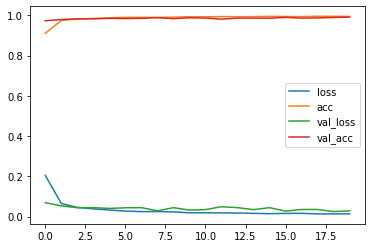

In [48]:
pd.DataFrame(model.history.history).plot()

In [49]:
preds=np.array([])
ys=np.array([])
for x,y in tqdm.tqdm(test_dataset):
    pred = model.predict(x)
    preds=np.append(preds,pred)
  
    ys=np.append(ys,y)
    
    
    
    

100%|██████████| 78/78 [00:03<00:00, 20.79it/s]


In [50]:
 preds = preds>0.5
 preds=preds.astype(int)

accuracy_score: 0.9907741676694746
precision_score: 0.9927477840451249
recall_score: 0.9887640449438202
f1_score: 0.9907519099316445


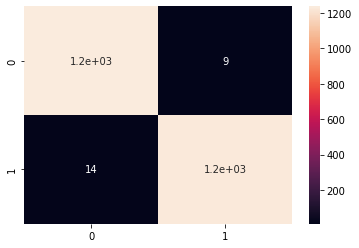

In [51]:
accuracy_score=metrics.accuracy_score(y_true=ys,y_pred=preds)
precision_score=metrics.precision_score(ys,preds)
recall_score=metrics.recall_score(ys,preds,)
f1_score=metrics.f1_score(ys,preds)
confion_metrix=metrics.confusion_matrix(ys,preds)
print('accuracy_score:',accuracy_score)
print('precision_score:',precision_score)
print('recall_score:',recall_score)
print('f1_score:',f1_score)

sn.heatmap(confion_metrix,annot=True)
